In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data = df.copy()

In [5]:
df = df.drop(['PassengerId','Ticket','Name','Cabin'], axis=1)

In [6]:
def impute_nan(df,variable,mean):
    df[variable].fillna(mean,inplace = True)

In [7]:
impute_nan(df,'Age',df.Age.mean())

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.shape

(891, 8)

In [10]:
df['Sex'] = np.where(df['Sex'] == 'male',1,0)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df['Embarked'].fillna('S',inplace = True)

In [15]:
for feature in ['Age','Fare']:
    df[feature]=df[feature]**(1/12.7)

In [16]:
df_dict = {'S':0,'C':1,'Q':2}
df['Embarked'] = df['Embarked'].map(df_dict)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1.275565,1,0,1.168808,0
1,1,1,0,1.331657,1,0,1.399280,1
2,1,3,0,1.292454,0,0,1.177029,0
3,1,1,0,1.323062,1,0,1.367207,0
4,0,3,1,1.323062,0,0,1.178481,0


In [18]:
for i in ['Age','Fare']:
    
    ordinal_labels = df.groupby([i])['Survived'].mean().sort_values().to_dict()
    
    #ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}
    df[i] = df[i].map(ordinal_labels)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

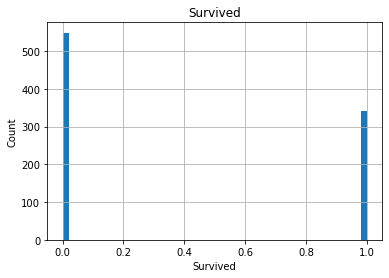

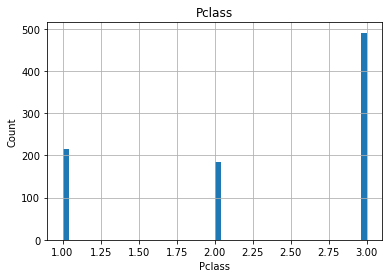

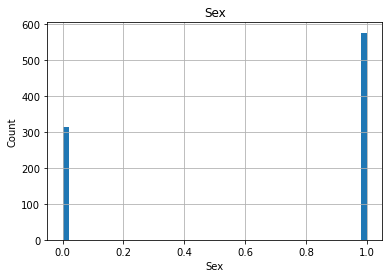

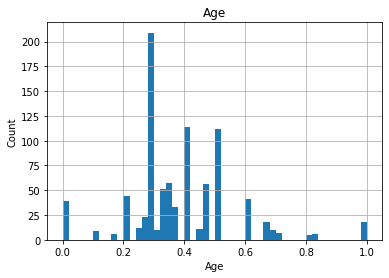

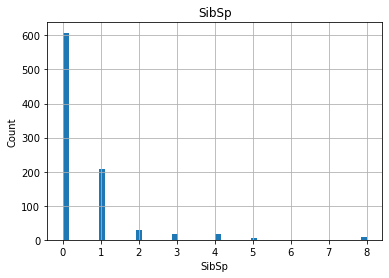

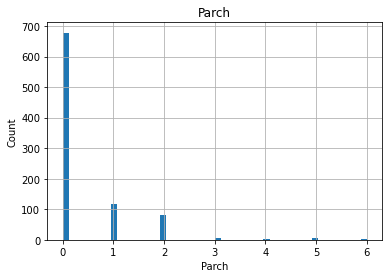

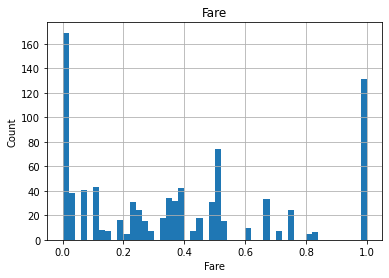

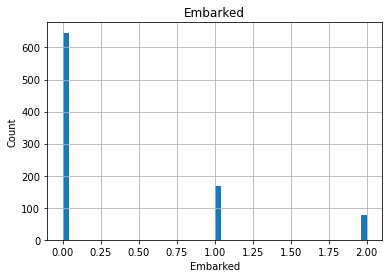

In [20]:
for feature in df:
    data=df.copy()
    figure=data[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [21]:
import scipy.stats as stat
import pylab

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [24]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.407407,1,0,0.076923,0
1,1,0,0.454545,1,0,1.000000,1
2,3,0,0.333333,0,0,0.444444,0
3,1,0,0.611111,1,0,0.600000,0
4,3,1,0.611111,0,0,0.116279,0
...,...,...,...,...,...,...,...
886,2,1,0.611111,0,0,0.380952,0
887,1,0,0.360000,0,0,0.833333,0
888,3,0,0.293785,1,2,0.000000,0
889,1,1,0.333333,0,0,0.833333,1


In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor(random_state=0)
model.fit(X,y)

ExtraTreesRegressor(random_state=0)

In [26]:
print(model.feature_importances_)

[0.03746025 0.24714213 0.16730036 0.02416158 0.02221572 0.47743902
 0.02428093]


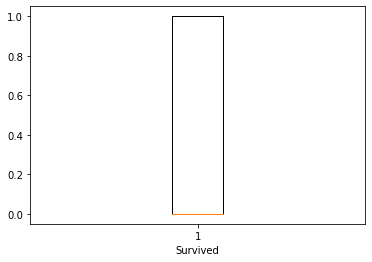

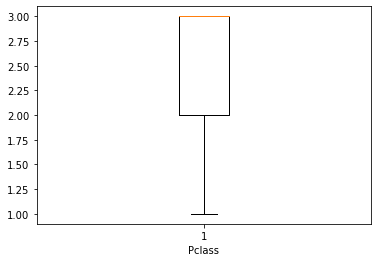

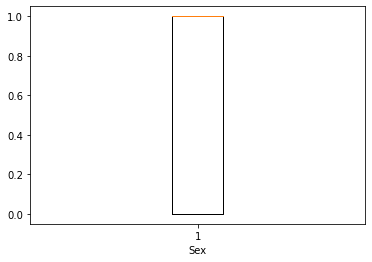

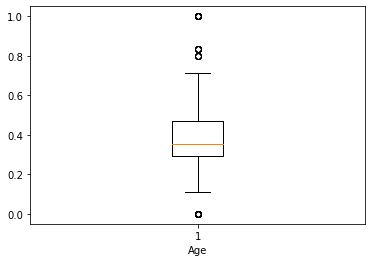

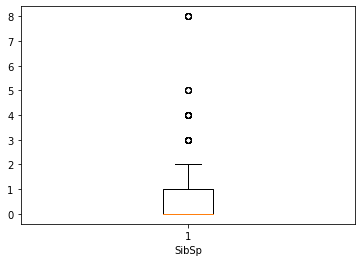

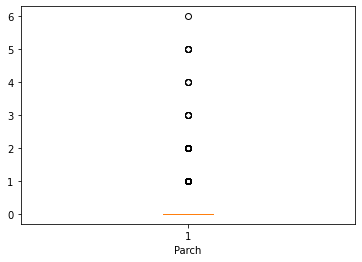

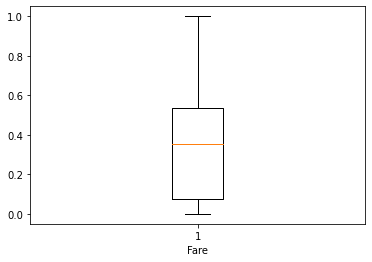

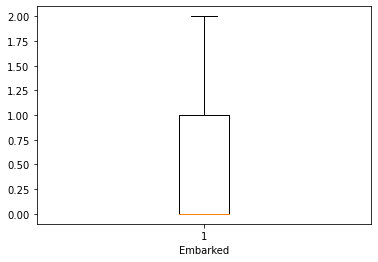

In [27]:
for feature in df.columns:
    data = df.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [28]:

for feature in df.drop(['Survived'],axis=1):
    IQR= df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_bridge = df[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge = df[feature].quantile(0.75)+(IQR*1.5)
    
    lower_bridge3 = df[feature].quantile(0.25)-(IQR*3)
    upper_bridge3 = df[feature].quantile(0.75)+(IQR*3)
    
    
    df.loc[df[feature]<=lower_bridge,feature] = lower_bridge
    df.loc[df[feature]>=upper_bridge,feature] = upper_bridge


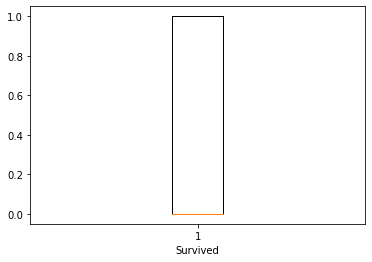

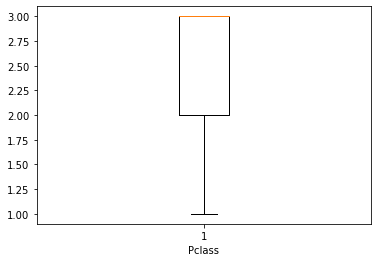

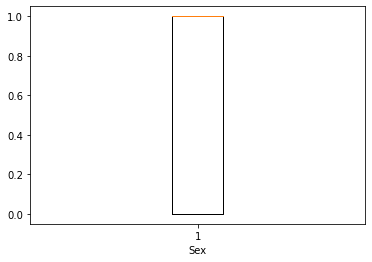

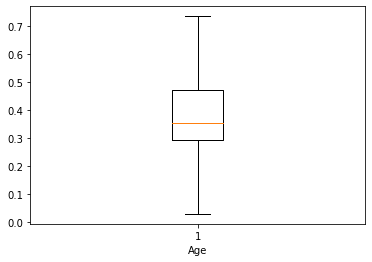

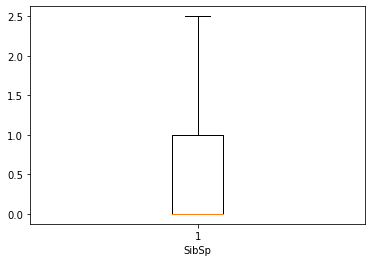

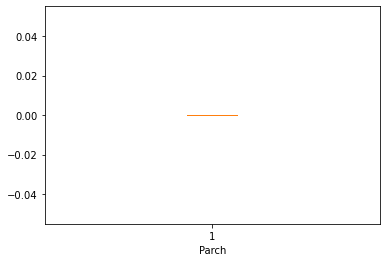

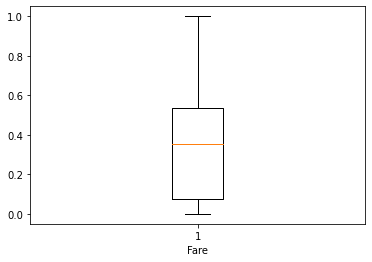

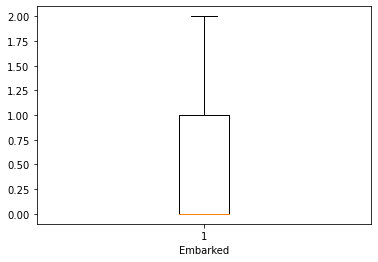

In [29]:
for feature in df.columns:
    data = df.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0)

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.407407,1,0,0.076923,0
1,1,0,0.454545,1,0,1.000000,1
2,3,0,0.333333,0,0,0.444444,0
3,1,0,0.611111,1,0,0.600000,0
4,3,1,0.611111,0,0,0.116279,0
...,...,...,...,...,...,...,...
886,2,1,0.611111,0,0,0.380952,0
887,1,0,0.360000,0,0,0.833333,0
888,3,0,0.293785,1,2,0.000000,0
889,1,1,0.333333,0,0,0.833333,1


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [35]:
lg = LogisticRegression(max_iter=10000)
lg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [36]:
y_pred = lg.predict(X_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score,roc_auc_score

print("MSE:",mean_squared_error(y_test,y_pred))

print(confusion_matrix(y_test,y_pred)*100)
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

MSE: 0.06666666666666667
[[4800  300]
 [ 300 3600]]
93.33333333333333
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.92      0.92      0.92        39

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



In [899]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

C:\Users\bhargavi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [900]:
y_pred = gnb.predict(X_test)

In [901]:
from sklearn.metrics import accuracy_score,roc_auc_score

print("MSE:",mean_squared_error(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

MSE: 0.0
[[110   0]
 [  0  69]]
100.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

